
It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

--Do any of your classifiers seem to overfit?

--Which seem to perform the best? Why?

--What features seemed to be most impactful to performance?

Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

In [2]:
sms_raw = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header = None)

In [3]:
sms_raw.columns = ['Sentence', 'Sentiment']

In [4]:
sms_raw.Sentiment.value_counts()

1    500
0    500
Name: Sentiment, dtype: int64

## 1) Negative Words

In [5]:

negative = ['waste', 'breaks', 'lousy','cannot','disappoint','disappointed','junk','poor',
           "doesn't", 'bad', "don't", 'problem', 'misleading', 'difficult','unreliable','horrible','broken','fail', 'terrible']

for word in negative:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(word)] = sms_raw.Sentence.str.contains(
        ' ' + str(word) + ' ',
        case=False
    )

In [6]:
sms_raw['Sentiment'] = (sms_raw['Sentiment'] == 0)

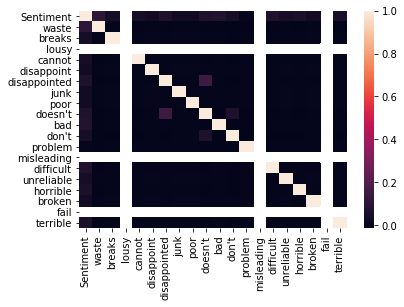

In [7]:
sns.heatmap(sms_raw.corr())

In [8]:
data = sms_raw[negative]  #features
target = sms_raw['Sentiment']  #ground_truth

In [9]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn import model_selection

data_train, data_test, target_train, target_test = sklearn.model_selection.train_test_split(
    data, target, test_size=0.30, random_state=42)

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_train, target_train)

# Classify, storing the result in a new variable.
test_pred = bnb.predict(data_test) #making predictions using test features
train_pred = bnb.predict(data_train)
train_confusion = pd.crosstab(target_train, train_pred)
test_confusion = pd.crosstab(target_test, test_pred)

# Display our results.
print("Train: Number of mislabeled points out of a total {} points: {}".format(
    data_train.shape[0],
    (target_train != train_pred).sum()
))

print("Test: Number of mislabeled points out of a total {} points: {}".format(
    data_test.shape[0],
    (target_test != test_pred).sum()
))

Train: Number of mislabeled points out of a total 700 points: 318
Test: Number of mislabeled points out of a total 300 points: 127


In [10]:
train_confusion

col_0,False,True
Sentiment,,
False,340,6
True,312,42


In [11]:
test_confusion

col_0,False,True
Sentiment,,
False,153,1
True,126,20


In [12]:
# Accuracy train
accuracy = (train_confusion.iloc[0,0]+train_confusion.iloc[1,1])/len(target_train)
print('Accuracy: ', accuracy)

# Specificity
specificity = train_confusion.iloc[0,0]/(train_confusion.iloc[0,1] + train_confusion.iloc[0,0])
print('Specificity: ', specificity)

# Sensitivity
sensitivity = train_confusion.iloc[1,1]/(train_confusion.iloc[1,0] + train_confusion.iloc[1,1])
print('Sensitivity: ', sensitivity)

Accuracy:  0.545714285714
Specificity:  0.982658959538
Sensitivity:  0.118644067797


In [13]:
# Accuracy Test
accuracy = (test_confusion.iloc[0,0]+test_confusion.iloc[1,1])/len(target_test)
print('Accuracy: ', accuracy)

# Specificity
specificity = test_confusion.iloc[0,0]/(test_confusion.iloc[0,1] + test_confusion.iloc[0,0])
print('Specificity: ', specificity)

# Sensitivity
sensitivity = test_confusion.iloc[1,1]/(test_confusion.iloc[1,0] + test_confusion.iloc[1,1])
print('Sensitivity: ', sensitivity)

Accuracy:  0.576666666667
Specificity:  0.993506493506
Sensitivity:  0.13698630137


Our train and test groups are similiar in accuracy, speicifity and sensitivity. Thus, there doesn't seem to be any overfitting. Since the sensitivities are low, the model is not great at identifying positive reviews correctly.

## 2) Positive Words

In [14]:
amazon = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header = None)

amazon.columns = ['Sentence', 'Sentiment']

In [15]:
positive = ['good','great','excellent','nice','love','beautiful','best','enjoy',
                  'highly','brilliant','tremendous','loved','awesome','impressed','perfect','pleased']

In [26]:
amazon['Sentiment'] = (amazon['Sentiment'] == 1)

In [16]:
for word in positive:
    amazon[word] = amazon['Sentence'].apply(lambda x: word in x)

In [17]:
data = amazon[positive]
target = amazon['Sentiment']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn import model_selection

data_train, data_test, target_train, target_test = sklearn.model_selection.train_test_split(
    data, target, test_size=0.30, random_state=42)

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_train, target_train)

# Classify, storing the result in a new variable.
test_pred = bnb.predict(data_test) #making predictions using test features
train_pred = bnb.predict(data_train)
train_confusion = pd.crosstab(target_train, train_pred)
test_confusion = pd.crosstab(target_test, test_pred)

# Display our results.
print("Train: Number of mislabeled points out of a total {} points: {}".format(
    data_train.shape[0],
    (target_train != train_pred).sum()
))

print("Test: Number of mislabeled points out of a total {} points: {}".format(
    data_test.shape[0],
    (target_test != test_pred).sum()
))

Train: Number of mislabeled points out of a total 700 points: 240
Test: Number of mislabeled points out of a total 300 points: 101


In [25]:
train_confusion

col_0,0,1
Sentiment,,
0,337,17
1,223,123


In [19]:
test_confusion

col_0,0,1
Sentiment,,
0,135,11
1,90,64


In [26]:
train_confusion.iloc[1,0]

223

In [30]:
# Accuracy train
accuracy = (train_confusion.iloc[0,0] + train_confusion.iloc[1,1])/len(target_train)
print('Accuracy: ', accuracy)

# Specificity
specificity = train_confusion.iloc[0,0]/(train_confusion.iloc[0,1]+train_confusion.iloc[0,0])
print('Specificity ', specificity)

# Sensitivity
sensitivity = train_confusion.iloc[1,1]/(train_confusion.iloc[1,0] + train_confusion.iloc[1,1])
print('Sensitivity ', sensitivity)

Accuracy:  0.657142857143
Specificity  0.95197740113
Sensitivity  0.35549132948


In [35]:
# Accuracy test
accuracy = (test_confusion.iloc[0,0] + test_confusion.iloc[1,1])/len(target_test)
print('Accuracy ', accuracy)

# Specificity
specificity = test_confusion.iloc[0,0]/(test_confusion.iloc[0,1] + test_confusion.iloc[0,0])
print('Specificity', specificity)

# Sensitivity
sensitivity = test_confusion.iloc[1,1]/(test_confusion.iloc[1,0] + test_confusion.iloc[1,1])
print('Sensitivity', sensitivity)

Accuracy  0.663333333333
Specificity 0.924657534247
Sensitivity 0.415584415584


Again, our train and test groups are similiar in accuracy, specificity and sensitivity, so not much of overfittying. Our accuracy is better than our first iteration, and while specificity is lower (still good at predicting negative reviews), the sensitivities are higher, meaning we are getting better at predicting positive reviews.

## Frequent Positive Words

In [36]:
#look at most common words in positive reviews

amazon = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header = None)

amazon.columns = ['Sentence', 'Sentiment']

amazon['Sentiment'] = (amazon['Sentiment'] == 1)

In [37]:
# Outcome variable
good = amazon.loc[amazon.Sentiment==1,'Sentence']

In [40]:
def modes(amz):
    counting = {}
    for item in amz.str.split('\s+'):
        for word in item:
            if word in counting:
                counting[word] += 1
            else:
                counting[word] = 1
                
    most = max(counting.values())
    
    least = min(counting.values())
    
    result = []
    #lets set the mode to words appearing more than 25 times
    for key, value in counting.items():
        if value >= 25:
            result.append(key)
            
    return result

In [41]:
mode_good = modes(good)
for word in mode_good:
    amazon[str(word)] = amazon.Sentence.str.contains(
        str(word),
        case=False
    )

In [42]:
data = amazon[mode_good]
target = amazon['Sentiment']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn import model_selection

#these data_train, etc are different than what defined above. cocneptually play different role
data_train, data_test, target_train, target_test = sklearn.model_selection.train_test_split(
   data, target, test_size=0.30, random_state=42)  #train_test_split makes a random choice

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# # Fit our model to the data.
bnb.fit(data_train, target_train)

# Classify, storing the result in a new variable.
test_pred = bnb.predict(data_test)
train_pred = bnb.predict(data_train)
train_confusion = pd.crosstab(target_train, train_pred)
test_confusion = pd.crosstab(target_test, test_pred)

# Display our results.
print("Train: Number of mislabeled points out of a total {} points : {}".format(
    data_train.shape[0],
    (target_train != train_pred).sum()
))


print("Test: Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != test_pred).sum()
))

Train: Number of mislabeled points out of a total 700 points : 222
Test: Number of mislabeled points out of a total 300 points : 112


In [45]:
train_confusion

col_0,False,True
Sentiment,,
False,285,69
True,153,193


In [46]:
test_confusion

col_0,False,True
Sentiment,,
False,105,41
True,71,83


In [43]:
#Accuracy train 
accuracy=(train_confusion.iloc[0,0]+train_confusion.iloc[1,1])/len(target_train)
print ('Accuracy : ', accuracy)

#Specifity
Specificity = train_confusion.iloc[0,0]/(train_confusion.iloc[0,1]+train_confusion.iloc[0,0])
print('Specificity : ', Specificity )

#Sensitivity
Sensitivity = train_confusion.iloc[1,1]/(train_confusion.iloc[1,0]+train_confusion.iloc[1,1])
print('Sensitivity : ', Sensitivity)

Accuracy :  0.682857142857
Specificity :  0.805084745763
Sensitivity :  0.557803468208


In [44]:
#Accuracy test
accuracy=(test_confusion.iloc[0,0]+test_confusion.iloc[1,1])/len(target_test)
print ('Accuracy : ', accuracy)

#Specifity
Specificity = test_confusion.iloc[0,0]/(test_confusion.iloc[0,1]+test_confusion.iloc[0,0])
print('Specificity : ', Specificity )

#Sensitivity
Sensitivity = test_confusion.iloc[1,1]/(test_confusion.iloc[1,0]+test_confusion.iloc[1,1])
print('Sensitivity : ', Sensitivity)

Accuracy :  0.626666666667
Specificity :  0.719178082192
Sensitivity :  0.538961038961


Higher results in training group, possibile overfitting. Getting better at identifying the positive words, but getting worse at predicting negative reviews (although still pretty good).

## Frequent Negative Words

In [59]:
#look at most common words in negative reviews

amazon = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header = None)

amazon.columns = ['Sentence', 'Sentiment']

amazon['Sentiment'] = (amazon['Sentiment'] == 0)

In [60]:
# Outcome variable
bad = amazon.loc[amazon.Sentiment==0,'Sentence']

In [61]:
def modes(amz):
    counting = {}
    for item in amz.str.split('\s+'):
        for word in item:
            if word in counting:
                counting[word] += 1
            else:
                counting[word] = 1

    
    most = max(counting.values())

    least = min(counting.values())
    
    result = []
    #lets set the mode to words appearing more than 25 times
    for key,value in counting.items():
        if value >=25:
            result.append(key)
            
    return result

In [62]:
mode_bad = modes(bad)
for word in mode_bad:
    amazon[str(word)] = amazon.Sentence.str.contains(
        str(word),
        case=False
    )

In [63]:
data = amazon[mode_bad]
target = amazon['Sentiment']

In [64]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn import model_selection


#these data_train, etc are different than what defined above. cocneptually play different role
data_train, data_test, target_train, target_test = sklearn.model_selection.train_test_split(
   data, target, test_size=0.30, random_state=42)  #train_test_split makes a random choice

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# # Fit our model to the data.
bnb.fit(data_train, target_train)

# Classify, storing the result in a new variable.
test_pred = bnb.predict(data_test)
train_pred = bnb.predict(data_train)
train_confusion = pd.crosstab(target_train, train_pred)
test_confusion = pd.crosstab(target_test, test_pred)

# Display our results.
print("Train: Number of mislabeled points out of a total {} points : {}".format(
    data_train.shape[0],
    (target_train != train_pred).sum()
))


print("Test: Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != test_pred).sum()
))

Train: Number of mislabeled points out of a total 700 points : 222
Test: Number of mislabeled points out of a total 300 points : 112


In [67]:
train_confusion

col_0,False,True
Sentiment,,
False,193,153
True,69,285


In [68]:
test_confusion

col_0,False,True
Sentiment,,
False,83,71
True,41,105


In [65]:
#Accuracy train 
accuracy=(train_confusion.iloc[0,0]+train_confusion.iloc[1,1])/len(target_train)
print ('Accuracy : ', accuracy)

#Specifity
Specificity = train_confusion.iloc[0,0]/(train_confusion.iloc[0,1]+train_confusion.iloc[0,0])
print('Specificity : ', Specificity )

#Sensitivity
Sensitivity = train_confusion.iloc[1,1]/(train_confusion.iloc[1,0]+train_confusion.iloc[1,1])
print('Sensitivity : ', Sensitivity)

Accuracy :  0.682857142857
Specificity :  0.557803468208
Sensitivity :  0.805084745763


In [66]:
#Accuracy test
accuracy=(test_confusion.iloc[0,0]+test_confusion.iloc[1,1])/len(target_test)
print ('Accuracy : ', accuracy)

#Specifity
Specificity = test_confusion.iloc[0,0]/(test_confusion.iloc[0,1]+test_confusion.iloc[0,0])
print('Specificity : ', Specificity )

#Sensitivity
Sensitivity = test_confusion.iloc[1,1]/(test_confusion.iloc[1,0]+test_confusion.iloc[1,1])
print('Sensitivity : ', Sensitivity)


Accuracy :  0.626666666667
Specificity :  0.538961038961
Sensitivity :  0.719178082192


Again, overfitting possible in train group as results are higher. Sensitivity showing we are getting better at identifying the positive reviews, but getting worse at identifying negative reviews.

## 5) Most Common Words Shared Between Positive and Negative Reviews

In [69]:
amazon = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header = None)

amazon.columns = ['Sentence', 'Sentiment']

In [70]:
#turn sentiment into boolean
amazon['Sentiment'] = (amazon['Sentiment'] == 1)

In [71]:
# Outcome Variable
shared = amazon.loc[:,'Sentence']

In [72]:
def modes(amz):
    counting = {}
    for item in amz.str.split('\s+'):
        for word in item:
            if word in counting:
                counting[word] += 1
            else:
                counting[word] = 1
                
    most = max(counting.values())
    
    least = min(counting.values())
    
    result = []
    #lets set the mode to words appearing more than 25 times
    for key, value in counting.items():
        if value >= 25:
            result.append(key)
            
    return result

In [73]:
mode_shared = modes(shared)
for word in mode_shared:
    amazon[str(word)] = amazon.Sentence.str.contains(
        str(word),
        case=False
    )

In [74]:
data = amazon[mode_shared]
target = amazon['Sentiment']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn import model_selection


#these data_train, etc are different than what defined above. cocneptually play different role
data_train, data_test, target_train, target_test = sklearn.model_selection.train_test_split(
   data, target, test_size=0.30, random_state=42)  #train_test_split makes a random choice

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# # Fit our model to the data.
bnb.fit(data_train, target_train)

# Classify, storing the result in a new variable.
test_pred = bnb.predict(data_test)
train_pred = bnb.predict(data_train)
train_confusion = pd.crosstab(target_train, train_pred)
test_confusion = pd.crosstab(target_test, test_pred)

# Display our results.
print("Train: Number of mislabeled points out of a total {} points : {}".format(
    data_train.shape[0],
    (target_train != train_pred).sum()
))


print("Test: Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != test_pred).sum()
))

Train: Number of mislabeled points out of a total 700 points : 189
Test: Number of mislabeled points out of a total 300 points : 94


In [75]:
train_confusion

col_0,False,True
Sentiment,,
False,276,78
True,111,235


In [76]:
test_confusion

col_0,False,True
Sentiment,,
False,104,42
True,52,102


In [81]:
# Accuracy train
accuracy = (train_confusion.iloc[0,0] + train_confusion.iloc[1,1])/len(target_train)
print('Accuracy: ', accuracy)

# Specificity
specificity = train_confusion.iloc[0,0]/(train_confusion.iloc[0,1]+train_confusion.iloc[0,0])
print('Specificity: ', specificity)

# Sensitivity
sensitivity = train_confusion.iloc[1,1] / (train_confusion.iloc[1,0] + train_confusion.iloc[1,1])
print('Sensitivity: ', sensitivity)

Accuracy:  0.73
Specificity:  0.779661016949
Sensitivity:  0.679190751445


In [84]:
# Accuracy test
accuracy = (test_confusion.iloc[0,0] + test_confusion.iloc[1,1])/len(target_test)
print('Accuracy: ', accuracy)

# Specificity
specificity = test_confusion.iloc[0,0]/(test_confusion.iloc[0,1] + test_confusion.iloc[0,0])
print('Specificity: ', specificity)

# Sensitivity
sensitivity = test_confusion.iloc[1,1]/(test_confusion.iloc[1,0] + test_confusion.iloc[1,1])
print('Sensitivity: ', sensitivity)

Accuracy:  0.686666666667
Specificity:  0.712328767123
Sensitivity:  0.662337662338


In [87]:
scores = model_selection.cross_val_score(bnb,data,target,cv=10)#combined accuracy
# cross_val_score will give test scores for each of the different splits
# prints accuracy
scores.mean()

0.69900000000000007

Accuracy, Specificity and sensitivity all higher in training group, again, possible overfitting. Specificity is back up, so we are getting better at prediciting the negative reviews, and Sensitivity is down but still pretty good, so positive reviews are being predicted well. I believe this iteration has the most optimal balance between Specificity and Sensitivity, though not the highest of each. However, combined, they are the highest.